# **I.** **ПЕРЕТВОРЕННЯ ТЕКСТОВИХ ПОВІДОМЛЕНЬ У ВЕКТОРНІ ПРЕДСТАВЛЕННЯ (EMBEDDING)**


# 1. Вибір віртуальної машини.

Запуск мовних моделей, особливо LLM, потребує значних обчислювальних ресурсів, тому в налаштуваннях середовища Colab необхідно обрати більш потужнішу віртуальну машину ***T4 GPU***.

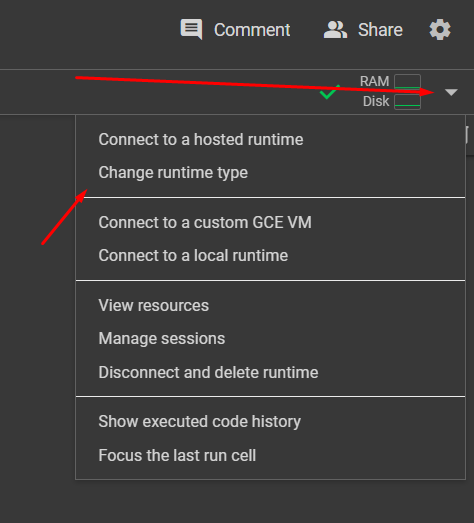

# 2. Завантаження датасету.

- Зареєструйтесь на платформі зі змагань по обробці даних https://www.kaggle.com/

- Отримайте API key в налаштуваннях профілю https://www.kaggle.com/settings



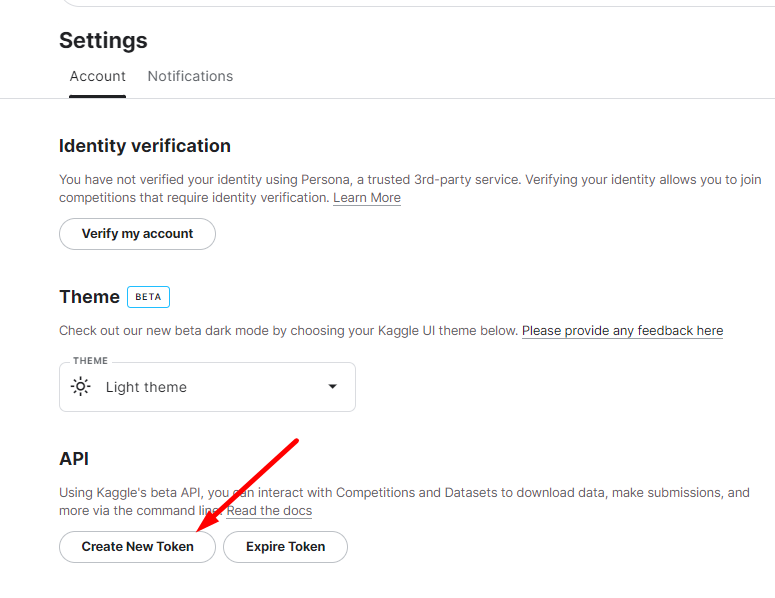

- Додайте Ваш ***username*** та ***api key*** до Secrets середовища Colab

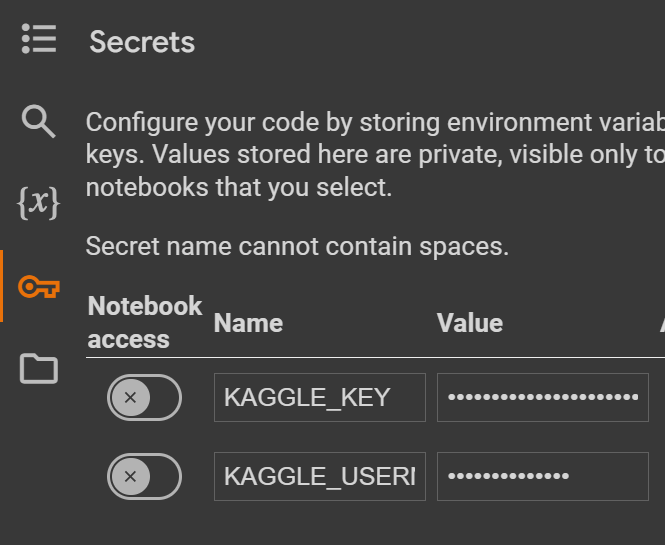

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

- Завантажте датасет ***Ukrainian News***


In [ ]:
!kaggle datasets download -d shyshcuk/ukrainian-news

! unzip "ukrainian-news.zip"

Dataset URL: https://www.kaggle.com/datasets/shyshcuk/ukrainian-news
License(s): Apache 2.0
 98% 1.00M/1.02M [00:00<00:00, 2.09MB/s]
100% 1.02M/1.02M [00:00<00:00, 2.12MB/s]
Archive:  ukrainian-news.zip
  inflating: news.csv                


- Імпортуйте необхідні бібліотеки Python та дані датасету в середовище Colab

In [ ]:
import pandas as pd
import numpy as np

news = pd.read_csv('news.csv')
news.head()

,Time,Title,Body
0,2024-01-09 14:58:00+02:00,Депутати Шкрум і Наталуха вперше стали батькам...,Дівчинку назвали Лук’яною\n\nНародна депутатка...
1,2024-01-09 18:23:00+02:00,На Київщині обмежать рух одним із мостів: що п...,У Київській області заборонять рух автотранспо...
2,2024-01-09 17:36:00+02:00,Жителі Підмосков'я замерзають у квартирах чере...,Росіяни гріються біля вогнищ у подвір'ях та по...
3,2024-01-09 08:58:00+02:00,У США прогримів потужний вибух у готелі міста ...,"Спочатку було зафіксовано 11 поранених, а згод..."
4,2024-01-09 10:46:00+02:00,Авіакомпанія RyanAir зробила найкоротший перел...,Вимушений переліт пов'язаний із закриттям зліт...


# 3. Завантаження мовної моделі.

- Встановіть необхідні компоненти:
  - бібліотеку для роботи з мовними моделями sentence_transformers;
  - бібліотеку для машинного навчання torch;
  - бібліотеку з реалізації алгоритму кластеризації hdbscan


In [ ]:
!pip install sentence_transformers torch hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using ca

- Завантажте мовну модель

При виконанні лабораторної роботи оберіть модель з одного з ресурсів:
- https://huggingface.co/sentence-transformers
- https://www.sbert.net/docs/pretrained_models.html

Тут, як приклад, завантажується багатомовна модель ***paraphrase-multilingual-MiniLM-L12-v2***
https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

Обрана при виконанні лабораторної роботи модель має бути іншою.

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# 4. Кодування текстових повідомлень до векторних представлень.

In [ ]:
corpus_embeddings = embedder.encode(news['Body'], convert_to_tensor=True)
news['embeddings'] = list(corpus_embeddings.cpu())
news.head()

,Time,Title,Body,embeddings
0,2024-01-09 14:58:00+02:00,Депутати Шкрум і Наталуха вперше стали батькам...,Дівчинку назвали Лук’яною\n\nНародна депутатка...,"[tensor(0.0290), tensor(0.0047), tensor(-0.020..."
1,2024-01-09 18:23:00+02:00,На Київщині обмежать рух одним із мостів: що п...,У Київській області заборонять рух автотранспо...,"[tensor(-0.0311), tensor(0.0703), tensor(-0.01..."
2,2024-01-09 17:36:00+02:00,Жителі Підмосков'я замерзають у квартирах чере...,Росіяни гріються біля вогнищ у подвір'ях та по...,"[tensor(-0.0693), tensor(-0.0413), tensor(-0.0..."
3,2024-01-09 08:58:00+02:00,У США прогримів потужний вибух у готелі міста ...,"Спочатку було зафіксовано 11 поранених, а згод...","[tensor(-0.1224), tensor(0.0129), tensor(-0.01..."
4,2024-01-09 10:46:00+02:00,Авіакомпанія RyanAir зробила найкоротший перел...,Вимушений переліт пов'язаний із закриттям зліт...,"[tensor(-0.0113), tensor(-0.0353), tensor(-0.0..."


# 5. Кластеризація векторних представлень

In [ ]:
import hdbscan
clustering = hdbscan.HDBSCAN(min_cluster_size=10)
clustering.fit(np.asarray(list(news['embeddings'])))

news['cluster_HDBSCAN_label'] = clustering.labels_
news

,Time,Title,Body,embeddings,cluster_HDBSCAN_label
0,2024-01-09 14:58:00+02:00,Депутати Шкрум і Наталуха вперше стали батькам...,Дівчинку назвали Лук’яною\n\nНародна депутатка...,"[tensor(0.0290), tensor(0.0047), tensor(-0.020...",-1
1,2024-01-09 18:23:00+02:00,На Київщині обмежать рух одним із мостів: що п...,У Київській області заборонять рух автотранспо...,"[tensor(-0.0311), tensor(0.0703), tensor(-0.01...",-1
2,2024-01-09 17:36:00+02:00,Жителі Підмосков'я замерзають у квартирах чере...,Росіяни гріються біля вогнищ у подвір'ях та по...,"[tensor(-0.0693), tensor(-0.0413), tensor(-0.0...",-1
3,2024-01-09 08:58:00+02:00,У США прогримів потужний вибух у готелі міста ...,"Спочатку було зафіксовано 11 поранених, а згод...","[tensor(-0.1224), tensor(0.0129), tensor(-0.01...",-1
4,2024-01-09 10:46:00+02:00,Авіакомпанія RyanAir зробила найкоротший перел...,Вимушений переліт пов'язаний із закриттям зліт...,"[tensor(-0.0113), tensor(-0.0353), tensor(-0.0...",-1
...,...,...,...,...,...
1079,2023-12-31 19:05:00+02:00,Кремль прагне підірвати підтримку України Фран...,Санкції Заходу проти Росії завдали шкоди еконо...,"[tensor(0.0071), tensor(0.0543), tensor(-0.011...",-1
1080,2023-12-31 12:30:00+02:00,«Збройна коаліція». Кого з відомих іноземців З...,"Представники різних країн – партнерів України,...","[tensor(0.0890), tensor(0.0195), tensor(-0.012...",-1
1081,2023-12-31 06:00:49+02:00,Новорічний стіл-2024: скільки заплатять українці,У середньому за новорічний стіл треба заплатит...,"[tensor(-0.0080), tensor(0.0471), tensor(-0.01...",-1
1082,2023-12-31 12:41:00+02:00,Святкові дні в Києві: що відомо про комендантс...,Залишати домівку вночі дозволяється лише під ч...,"[tensor(-0.0516), tensor(-0.0571), tensor(-0.0...",-1


# 6. Пониження розмірності та візуалізація векторних представлень

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0)
X_t = tsne.fit_transform(np.asarray(list(news['embeddings'])))
news['TSNE'] = X_t.tolist()

import plotly.express as px
import numpy as np

fig = px.scatter_3d(
    data_frame=news,
    x=[i[0] for i in news['TSNE']],
    y=[i[1] for i in news['TSNE']],
    z=[i[2] for i in news['TSNE']],
    color=news['cluster_HDBSCAN_label'],
    custom_data= ['Title', 'cluster_HDBSCAN_label']
)
fig.update_traces(
    marker_size=3,
    hovertemplate="<br>".join([
        "Title: %{customdata[0]}",
        "Cluster: %{customdata[1]}",
    ]))
fig.show()




# ІІ. ЗАДАЧА ГЕНЕРАЦІЇ ТЕКСТОВОЇ ПОСЛІДОВНОСТІ НА  LLM


 1. Завантаження бібліотеки моделей обробки природної мови ***KerasNLP***


In [ ]:
!pip install -q tensorflow==2.16.1
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

In [ ]:
import os
import keras
import keras_nlp

os.environ["KERAS_BACKEND"] = "jax"  # Or "tensorflow" or "torch".
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.9"

2. Завантаження LLM ***Gemma***

Перед завантеженням моделі необхідно прийняти ліцензійні умовови використання https://www.kaggle.com/models/keras/gemma/license/consent

In [ ]:
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")

Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'task.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'model.weights.h5' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 

- from_preset команда завантаження заданої моделі;
- "gemma_2b_en" визначає архітектуру та ваги LLM (модель генерації тексту англійською мовою ***gemma_2b_en*** з 2 мільярдами параметрів).

In [ ]:
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,506,172,416 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,506,172,416 (9.34 GB)

 Trainable params: 2,506,172,416 (9.34 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
gemma_lm.generate("What is the meaning of life?", max_length=64)

'What is the meaning of life?\n\nThe question is one of the most important questions in the world.\n\nIt’s the question that has been asked by philosophers, theologians, and scientists for centuries.\n\nAnd it’s the question that has been asked by people who are looking for answers to their own lives'

In [ ]:
gemma_lm.generate("Who is Taras Shevchenko?", max_length=512)

'Who is Taras Shevchenko?\n\nIn each of the following sentences, underline the correct form of the adjective or adverb in parentheses.\n\n<strong>Example 1</strong>. This fireworks display is (impressiver, $\\underline{{more~ impressive}}$) than last year’s was.\n\nUnfortunately, <em>(manier, many)</em> children in the United States are not covered by health insurance.\n\nWhat is the correct present tense form of the verb?\nSu hermano ____ (pensar) bañarse.\n\nIn each of the following sentences, underline the correct spelling of the word in parentheses.\n\n<em>(Spectateors, Spectators)</em> may watch the'

In [ ]:
gemma_lm.generate("Яким чином сонце впливає на кліматичні зміни на Землі?", max_length=512)

'Яким чином сонце впливає на кліматичні зміни на Землі?\n\nЯкі наслідки глобального потепління для клімату?\n\nЩо таке глобальне потепління?\n\nЩо таке кліматичні зміни?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичні моделі?\n\nЩо таке кліматичн

In [ ]:
gemma_lm.generate("Які переваги та недоліки використання відновлювальних джерел енергії?", max_length=512)

'Які переваги та недоліки використання відновлювальних джерел енергії?\n\nВідновлювані джерела енергії - це джерела енергії, які можна використовувати без виходу в атмосферу. Вони включають сонячну енергію, вітер, воду, гравітацію та інші природні процеси.\n\nВідновлювані джерела енергії можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для виробництва електроенергії, тепла та води. Вони можуть бути використані для

In [ ]:
gemma_lm.generate("Які основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?", max_length=512)

"Які основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в історії комп'ютерної науки?\n\nЯкі основні етапи розвитку штучного інтелекту в іст

In [ ]:
gemma_lm.generate("Чому деякі види рослин стають вимерлими через дії людини, а інші ні?", max_length=512)

'Чому деякі види рослин стають вимерлими через дії людини, а інші ні?\n\n<h2>Визначення</h2>\n\nВимерлі види - це види, які більше не існують.\n\n<h2>Причини вимирання</h2>\n\nВимирання може бути природним або штучним.\n\n<h3>Природне вимирання</h3>\n\nПриродне вимирання - це вимирання, яке відбувається природно.\n\nПриклади:\n\n* Вимирання динозаврів\n* Вимирання птахів\n* Вимирання тварин\n\n<h3>Штучне вимирання</h3>\n\nШтучне вимирання - це вимирання, яке відбувається через людські дії.\n\nПриклади:\n\n* Вимирання динозаврів\n* Вимирання птахів\n* Вимирання тварин\n\n<h2>Причини вимирання</h2>\n\nПричини вимирання можуть бути різними.\n\n<h3>Причини природного вимирання</h3>\n\nПричини природного вимирання включають:\n\n* <strong>Зміни клімату</strong>: Зміни клімату можуть впливати на рослини, змінюючи їх умови.\n* <strong>Зміни в навколишньому середовищі</strong>: Зміни в навколишньому середовищі можуть впливати на рослини, змінюючи їх умови.\n* <strong>Зміни в популяції</strong>:

In [ ]:
gemma_lm.generate("Які технологічні інновації можуть змінити світ медицини в найближчому майбутньому?", max_length=512)

'Які технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медицини в найближчому майбутньому?\n\nЯкі технологічні інновації можуть змінити світ медици

In [ ]:
gemma_lm.generate("Яким чином медіа-платформи впливають на психологічне здоров'я суспільства?", max_length=512)

"Яким чином медіа-платформи впливають на психологічне здоров'я суспільства?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі фактори впливають на психологічне здоров'я?\n\nЯкі

In [ ]:
gemma_lm.generate("Які стратегії ефективного вивчення мови в дорослому віці?", max_length=512)

'Які стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективного вивчення мови в дорослому віці?\n\nЯкі стратегії ефективно

In [ ]:
gemma_lm.generate("Яким чином революція в генетиці може змінити сільське господарство та харчову промисловість?", max_length=512)

'Яким чином революція в генетиці може змінити сільське господарство та харчову промисловість?\n\n<h2>Революція в генетиці</h2>\n\nРеволюція в генетиці - це зміна генетичних методів, які використовуються для створення нових генетичних ресурсів.\n\n<h3>Революція в генетиці</h3>\n\nРеволюція в генетиці - це зміна генетичних методів, які використовуються для створення нових генетичних ресурсів.\n\n<h3>Революція в генетиці</h3>\n\nРеволюція в генетиці - це зміна генетичних методів, які використовуються для створення нових генетичних ресурсів.\n\n<h3>Революція в генетиці</h3>\n\nРеволюція в генетиці - це зміна генетичних методів, які використовуються для створення нових генетичних ресурсів.\n\n<h3>Революція в генетиці</h3>\n\nРеволюція в генетиці - це зміна генетичних методів, які використовуються для створення нових генетичних ресурсів.\n\n<h3>Революція в генетиці</h3>\n\nРеволюція в генетиці - це зміна генетичних методів, які використовуються для створення нових генетичних ресурсів.\n\n<h3